<a href="https://colab.research.google.com/github/avilashsrivastava/Bike-Sharing-Demand-Prediction/blob/main/Individual_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Introduction

<b> “All knowledge - past, present, and future - can be derived from data by a single, universal learning algorithm.”</b> - Pedro Domingos; Pedro is a professor of computer science and engineering at the University of Washington. He is a researcher in machine learning known for Markov logic network enabling uncertain inference.

<b> "Machine Learning"</b>, has become a boon for modern day science as it not only has made scientific experiments and researches easier but with the capability to think, has produced results way beyond human limits. And this is just a childhood  stage, with more advancements in technologies, algorithms, we could not even possibly imagine to what extent future Artificial Intelligence will excell.

But at an early stages of a baby, we as a parent should first try to teach AI to take first steps, and as we know this is just a beginning, we should first teach, how to find similar patterns to identify the world besides him, so that the machine could learn and answer when new questions are asked.

That being said, in this exercise I will try to implement various machine learning algorithms to try and predict a regression problem. Regression in machine learning means, predicting numerical values. I will try my best to provide a fair enough analysis but surely theres always scope of a better version. The contents of the notebook include:

1. <b>Exploratory data analysis:</b> In this section we will take a look at the features we have and by using different visualization techniques, find relationships among them.

2. <b>Data Wrangling</b>: In this section we will try to modify our dataset, handle missing values, outliers, form new columns, convert data types, etc.

3. <b> Splitting data and Standardization</b>: Here we will split out data into train and test sets and apply standardization methods.

4. <b> Fit different models:</b> We will use some ML algorithms such as Linear regression, Decision tree, Random forest etc. and also check the performance using different evaluation metrics. We will also do hyperparameter tuning and implement regularization techniques to improve performance.

5. <b> Conclusion</b>: Finally, we will try to dig insights from our experiment and frame all the observations made during the analysis.

Lets begin!

In [103]:
# importing python libraries that would help us immensely during our endeavour
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


# to not get tensed over unnecessary warwings we will ignore them
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [104]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
# loading the big guy
directory_path="/content/drive/MyDrive/Almabetter/Bike Sharing Demand Prediction - Avilash Srivastava/"
seoul_df=pd.read_csv(directory_path+"SeoulBikeData.csv",encoding= 'unicode_escape')

Now that we have loaded our data, let us have an intial look at it.

In [106]:
# looking for top 5 rows
seoul_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [107]:
#looking for bottom 5 rows
seoul_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [108]:
# finding the columns of the datset
print('The columns in the dataset are:','\n','\n',seoul_df.columns.to_list())

The columns in the dataset are: 
 
 ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [109]:
# finding the types of data in each column
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The dataset has 3 types of data namely: Integer, float, strings/objects

In [110]:
# finding total no of rows in dataset
print("The no of rows in the dataset is: ",len(seoul_df))

The no of rows in the dataset is:  8760


### Understanding problem statement

Great! Now that we have seen what the data looks like, its time to understand what these features/variables/columns are and try to understand the problem statement given above.

1. We have a variable 'date' which tells us the day on which some bookings were made

2. We have a variable 'hour' which tells which hour of the day the bookings were made.

3. We have some numerical type variables such as temperature, humidity, wind, visiblity, dew point temp, solar radiation, rainfall, snowfall which tells the environment conditions at that particular hour of the day.

4. We have some categorical variable such as seasons, is it a holiday and is it a fuctioning day or not.

5. And finally we have 'rented bike count' variable which we need to predict for new observations given the other variables.

Bike rentals have became a popular service in recent years and it seems people are using it more offen. With relatively cheaper rates and ease of pick up and drop at own convenience is what making this business excell. Mostly used by people having no personal vehicles and also to avoid congested public transport which follows its own time.

Therefore, the business to strive and profit more, it has to be always ready and supply no. of bikes at different locations, to fulfil the demand. A pre planned set of bike count values can therefore, be a handy solution to meet all demands.



Now that we know what we need to do in this exercise. Let us ask ourselves some questions:

1. Are the numerical variables which can be be segmented into 'Environment conditions', have any impact on our dependent variable? (dependent variable, short - dv, in this case is our "rental bikes count" which we need to predict).

  Why do we need them in first place?

   Do these variable have any correlation with each other and also with   dependent variable?

   Do these variable follow similar kind of distribution?

2. Does the hour of the day reflects changes in bike demand?

3. Does demand gets affected during different seasons, holidays etc?

Let us now dwelve deeper and try to find those answers. Finally, we will fit various models that will predict bikes count given new observation.

Lets do it!

# 1. Exploratory Data Analysis

Exploratory data analysis aka EDA may sound fancy but is one of the most important step before we build a model. It tells us everything about the variables, their nature, structure, distribution, effects, importance, relationship with other variables and much more. An elegant EDA of the data helps to identify hidden patterns and find the driving factors who influence the dependent variable. Furthermore, it helps us to check on various assumptions that various models such as Linear regression demands. This is all done by using different visualization techniques such as bar graphs, histograms, boxplots, heatmaps etc.

Lets dig deeper in analysing our first variable i.e., dependent variable and later we will analyse other variables.

### Univariate analysis

In this section we will deal with each variables independently. Its important to note that some datasets concerning different type of problem can have a large number of variables/columns. So it might not be possible to conduct univariate analysis on all of them. There are ways in which we can skip the step and continue with multivariate analysis. However, in this problem we dont have much columns so we can proceed analysing each variable.

<b> 1. "Rental Bike Count" - Dependent variable(dv)

As the most important variable in the data, let us try to find the descriptive stats of data and its distribution.

In [111]:
# descriptive stats of dv
seoul_df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

It looks like their might be some outliers in our variable if we observe the min, max, 25% and 75% values. 

Text(0.5, 1.0, "Boxplot of 'rented bike count'")

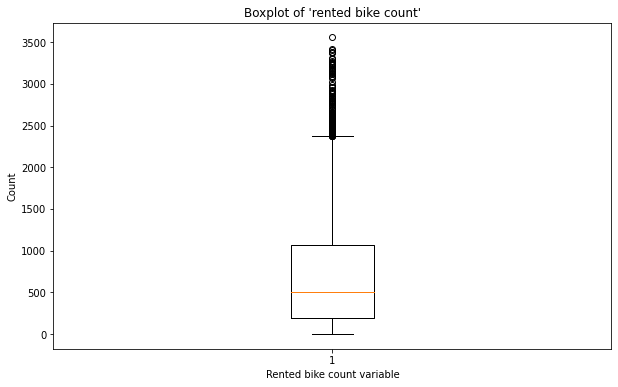

In [112]:
# checking outliers using box plot
plt.figure(figsize=(10,6))
plt.boxplot(seoul_df['Rented Bike Count'])
plt.xlabel('Rented bike count variable')
plt.ylabel('Count')
plt.title("Boxplot of 'rented bike count'")

Looks like we have a lot of outliers on the maximum side(above ~2500). We will deal with them later in this analysis. Let us now check the distribution of our variable.

Skewness: 1.153428
Kurtosis: 0.853387


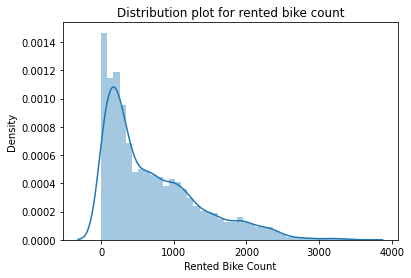

In [113]:
# checking the distribution of dv
sns.distplot(seoul_df['Rented Bike Count'])
plt.title('Distribution plot for rented bike count')

#skewness and kurtosis
print("Skewness: %f" % seoul_df['Rented Bike Count'].skew())
print("Kurtosis: %f" % seoul_df['Rented Bike Count'].kurt())

Looks like our variable is positively skewed having value 1.152 and has peakedness of 0.853. Let's take square root of our dv( as it is moderately skewed) and draw the plot it will give us more clarification about data and we can visualize in a better way

Text(0.5, 1.0, 'Sqrt transformed rented bike count')

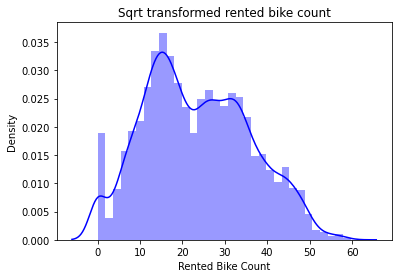

In [114]:
# checking the distribution of dv after log transformation
sns.distplot(np.sqrt(seoul_df['Rented Bike Count']),color='b')
plt.xlabel('Rented Bike Count')
plt.title('Sqrt transformed rented bike count')

Beautiful! After applying a transformation we can see that our dv is somewhat resembling a normal distribution. Now we dont have to take care of the outliers as transformation has done the job for us. 

Note: One should proceed with caution when considering to remove observations from the data. In many cases, there is a valid reason for these observations to exist.

<b> 2. Functioning day</b>


It is a categorical variable with two values 'Yes' And 'No' as shown below. It tells us that whether the day was a normal business day for a company or not.

In [115]:
# finding the categories of this variable
print('The categories in functioning day are: ',seoul_df['Functioning Day'].unique().tolist())

The categories in functioning day are:  ['Yes', 'No']


Let us find the count of each one of these category and visualize them.

In [116]:
# finding the count of Yes and No
seoul_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

Text(0.5, 1.0, 'Countplot for functioning day variable')

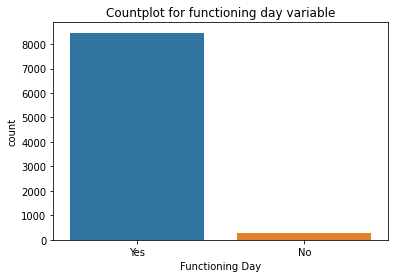

In [117]:
# visualizing the counts
sns.countplot(seoul_df['Functioning Day'])
plt.title('Countplot for functioning day variable')

It looks like the majority class is Yes for this variable. And almost 3% No. It would be reasonable enough to drop this column during our model fitting. 

<b> 3. Holiday

It is a categorical variable having two classes 'No holiday' and 'Holiday'. Can be an important variable because there would be more demand during holidays as people like to tour during holidays. Lets see!

In [118]:
# finding the categories of this variable
print('The categories in holiday are: ',seoul_df['Holiday'].unique().tolist())

The categories in holiday are:  ['No Holiday', 'Holiday']


Let us find the count of each one of these category and visualize them.

In [119]:
# finding the count of holiday and No holiday
seoul_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Text(0.5, 1.0, 'Countplot for holiday variable')

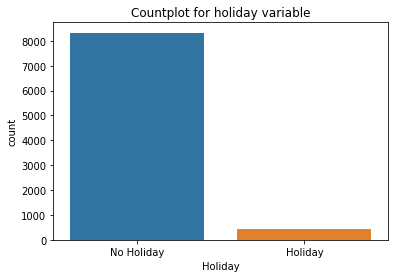

In [120]:
# visualizing the counts
sns.countplot(seoul_df['Holiday'])
plt.title('Countplot for holiday variable')

Again we have majority of one class here and other class being only around 5%. Hence we will drop this column during fitting Linear regression.

Question: But why we should drop the column?

Thats because we have around 95 percent belonging to a single class. Thus, if we get a new set of observations to predict, there is 95% probability that it will belong to the majority class. If you want to keep both classes for modelling, it would be better to get more data and look for better proportions of the classes, that would have an impact on our dv.

<b> 4. Seasons

It is a categorical variable are Winter, Spring, Summer and Autumn as shown below. Let us also find the counts of each categories.

In [121]:
# finding the categories of season variable
print('The categories in seasons are: ',seoul_df['Seasons'].unique().tolist())

The categories in seasons are:  ['Winter', 'Spring', 'Summer', 'Autumn']


In [122]:
# finding the count of each category of seasons.
seoul_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

Text(0.5, 1.0, 'Counts of each season')

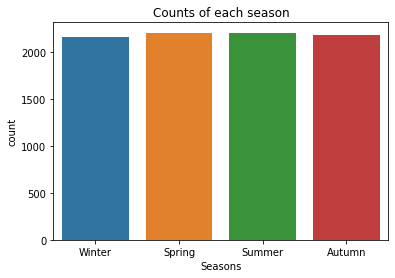

In [123]:
# visualize the counts
sns.countplot(seoul_df['Seasons'])
plt.title('Counts of each season')

Cleary we have an equal proportions of each of the seasons. We will see if this has any effect on our dv in our multivariate analysis and if it does, will surely encode this in our prediction model.

<b> 5. Date

It is a numerical variable which tells us the date of bookings. Let us see the count of how many days we have. For that we will try to separate the date column into days, months and years.

In [124]:
# making a fuction to separate date
def date_seperator_year(date_column):
  return date_column[6:]
def date_seperator_month(date_column):
  return date_column[3:5]
def date_seperator_day(date_column):
  return date_column[:2]

In [125]:
# creating a copy od our dataframe to apply changes.
seoul_df_copy=seoul_df.copy()

In [126]:
# making new columns
seoul_df_copy['Day']=seoul_df_copy['Date'].apply(date_seperator_day)
seoul_df_copy['Month']=seoul_df_copy['Date'].apply(date_seperator_month)
seoul_df_copy['Year']=seoul_df_copy['Date'].apply(date_seperator_year)

In [127]:
# checking the changes
seoul_df_copy.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017


Great! Three more columns have been added. Now let us see the no of years, month we have

In [128]:
# checking no of years
seoul_df_copy['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

Text(0.5, 1.0, 'Count of Years')

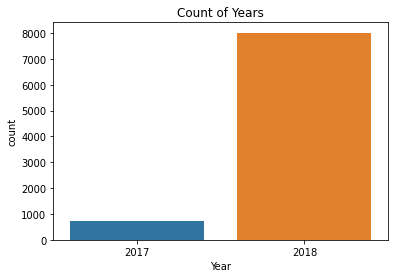

In [129]:
# visualizing it
sns.countplot(seoul_df_copy['Year'])
plt.title('Count of Years')

Looks like we have most of the data from year 2018. Again we will drop this column in our analysis. Let us now have a look at months.

Text(0.5, 1.0, 'Count of each months')

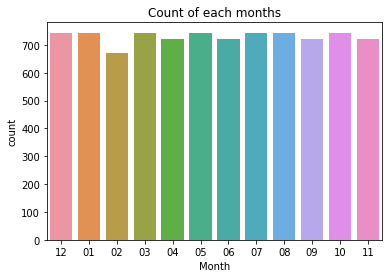

In [130]:
# finding the counts of month
sns.countplot(seoul_df_copy['Month'])
plt.title('Count of each months')

We have almost equal no. of records for each month. We will keep this column in our analysis for now. Lets see the days.

Text(0.5, 1.0, 'Count of each day')

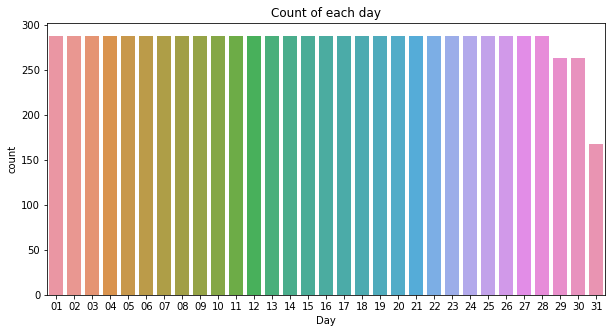

In [131]:
# finding the counts of days
plt.figure(figsize=(10,5))
sns.countplot(seoul_df_copy['Day'])
plt.title('Count of each day')

Looks like we have equal no. of observations for each with little less observations for last days of the months.

Now, let us analyse the numerical variables using boxplot. We will run a for loop to fasten our analysis.

<b> 6. All numerical variables

In [132]:
# first let us find the descriptive stats of our numerical variables
seoul_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Hmmm.. Looking at the descriptions we can see last three colums, rainfall, snowfall, solar radiation have mostly 0 values. Let us confirm using box plot and distplots.

In [133]:
# creating a list of numerical variable
list_of_nv=['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

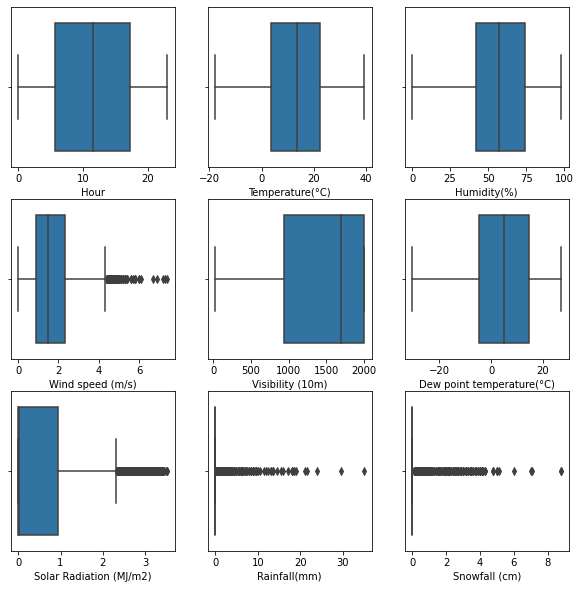

In [134]:
# running a for loop over each of the variables
plt.figure(figsize=(10,10))
for index,item in enumerate(list_of_nv):
  plt.subplot(3,3,index+1)
  sns.boxplot(seoul_df[item])

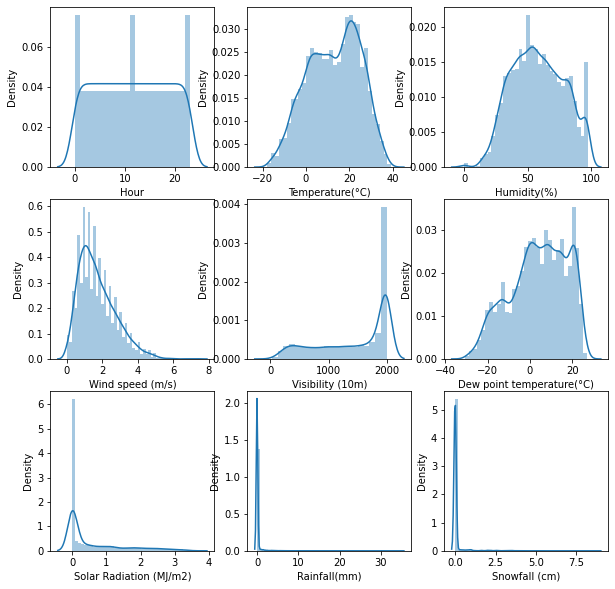

In [135]:
# checking the distribution
plt.figure(figsize=(10,10))
for index,item in enumerate(list_of_nv):
  plt.subplot(3,3,index+1)
  sns.distplot(seoul_df[item])

Awesome! Looks like we dont have much outliers in our numerical variables. Also variable such as rainfall and snowfall have almost all zeroes. There are also variables such as visiblity and solar radiation which as skewed. We will handle them later in the analysis.

<b> Observations from univariate analysis</b>

1. Our dv was slightly positively skewed. We applied square root transformation to make it somewhat normally distributed. Thus handling the outliers as well.

2. Variables such as functioning day, holiday, year had majority of one class. We decided to drop these columns.

3. Some numerical variables had maximum 0 values such as snowfall and rainfall. 

### Multivariate Analysis

Now that we went through each of the variables independently, let us now examine the relationship of each variable with our dependent variable.
First let us find the correlation of each variables. For this first we need to change the data type of the new columns we formed earlier.

In [136]:
# changing the data types of day and month column 
seoul_df_copy['Day']=seoul_df_copy['Day'].astype('int64')
seoul_df_copy['Month']=seoul_df_copy['Month'].astype('int64')

In [137]:
# checking our conversion
print('The type of 1st row of day column is:\n',type(seoul_df_copy['Day'][1]))

The type of 1st row of day column is:
 <class 'numpy.int64'>


Text(0.5, 1.0, 'Heatmap')

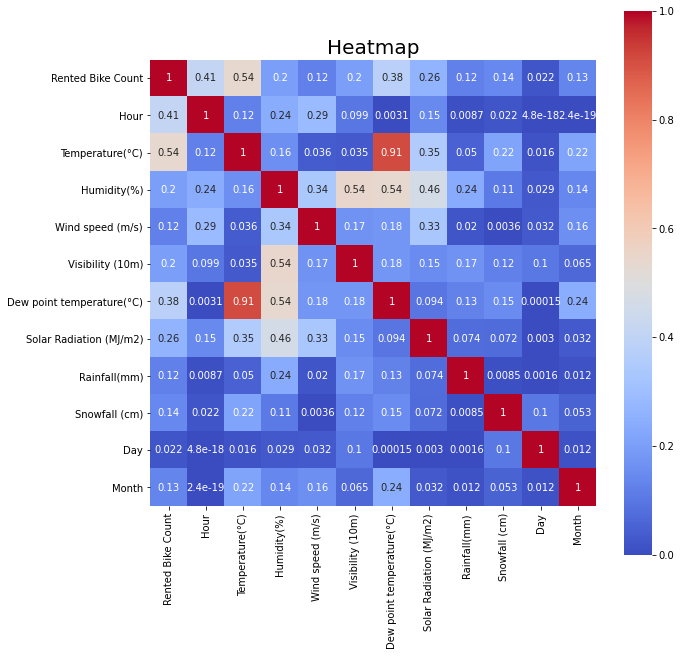

In [138]:
# finding the correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(abs(seoul_df_copy.corr()),cmap='coolwarm', annot=True, square=True)
plt.title('Heatmap',fontsize=(20))

Heatmap is a beautiful representation that tells us the correlation between each features in our dataset. Also it helps us to identify multicollinearity which are one of the assumptions we need to take care of while using Linear regression. Looking at the heatmap above we can observe:

1. There is not much correlation between most of the variables.

2. We can see heavy correlation in two variables i.e., Dew point temperature and Temperature.

3. One important thing to note here is, while doing linear regression one assumption it demands is that the independent variables should show some linear relation with our dependent variable but here we see that there is very less correlation with our dv, rented bike count. In cases such as these, Linear regression might not show good results.

Let us now find the variation inflation factor(VIF) for these variables that will give us a clear picture of multicollinearity.

In [139]:
# Defining a function to calculate VIF
def calc_vif(X):
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [140]:
# calculating vif
calc_vif(seoul_df_copy[[i for i in seoul_df_copy.describe().columns if i not in ['Rented Bike']]])

,variables,VIF
0,Rented Bike Count,4.143377
1,Hour,5.046304
2,Temperature(°C),41.066993
3,Humidity(%),8.552434
4,Wind speed (m/s),4.882107
5,Visibility (10m),9.493999
6,Dew point temperature(°C),19.974876
7,Solar Radiation (MJ/m2),2.932098
8,Rainfall(mm),1.104618
9,Snowfall (cm),1.144220


Here we can observe there is high vif for temperature and dew point temperature(41 and 19 respectively) as seen earlier from the heatmap that they were highly correlated. Our goal now becomes to bring those no. down to less than 10. Let us try by removing the variable dew point temperature. 

In [141]:
# calculating vif
calc_vif(seoul_df_copy[[i for i in seoul_df_copy.describe().columns if i not in ['Rented Bike','Dew point temperature(°C)']]])

,variables,VIF
0,Rented Bike Count,4.110260
1,Hour,4.708249
2,Temperature(°C),4.498110
3,Humidity(%),7.121979
4,Wind speed (m/s),4.675694
5,Visibility (10m),5.555559
6,Solar Radiation (MJ/m2),2.286121
7,Rainfall(mm),1.104021
8,Snowfall (cm),1.139761
9,Day,3.786169


Great we have now brought all the vif values around 5, thus handling multicollinearity. Let us now find the relationship of all variables with our dv.

<b> 1. Seasons(categorical variable) 

Text(0, 0.5, 'rented bike count')

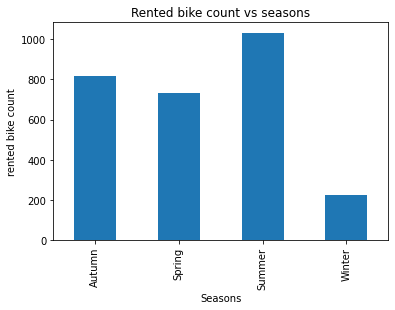

In [142]:
# checking th mean rented bike count in each seasons.
seoul_df_copy.groupby(['Seasons'])['Rented Bike Count'].mean().plot(kind='bar')
plt.title('Rented bike count vs seasons')
plt.ylabel('rented bike count')

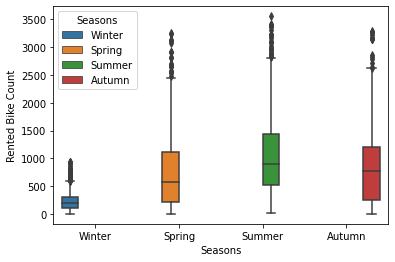

In [143]:
# visualize using boxplot
sns.boxplot(x=seoul_df_copy['Seasons'],y=seoul_df_copy['Rented Bike Count'],hue=seoul_df_copy['Seasons'])

It looks like for summer the bikes demand is high and for winters the demand is less. Reasonable to include this variable in our analysis. We will hot encode them later. Let us have a look at scatter plots of each numerical variable.

<b> 2. All numerical variables

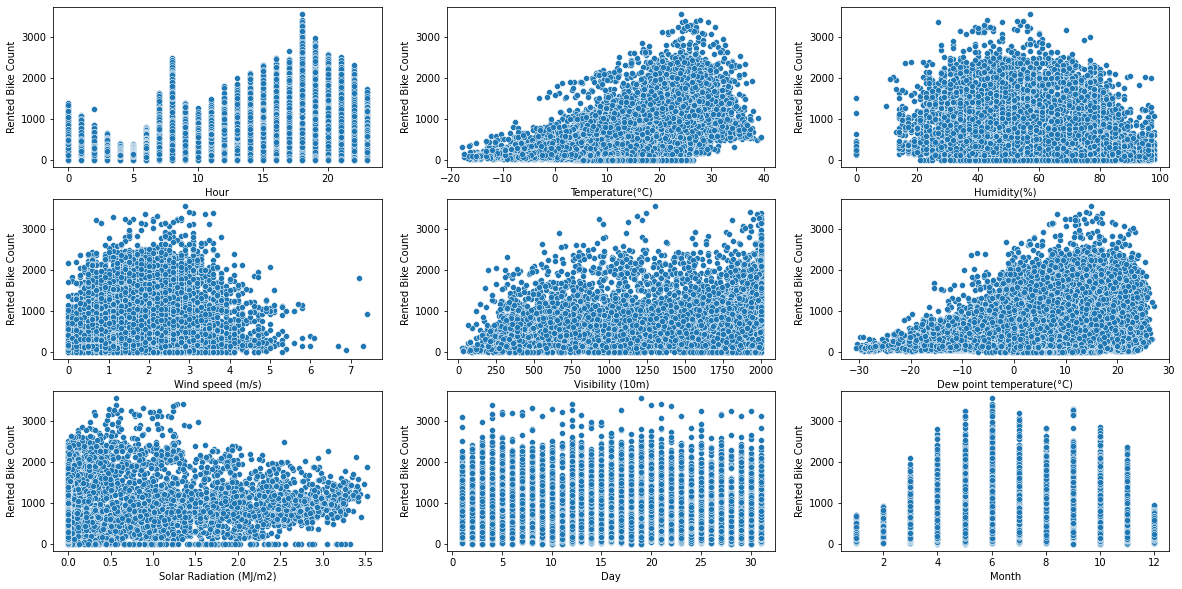

In [144]:
# creating a list of nv we need
list2=[i for i in seoul_df_copy.describe().columns.to_list() if i not in ['Snowfall (cm)','Rainfall(mm)','Rented Bike Count']]

# running a for loop over list2
plt.figure(figsize=(20,10))
for index,i in enumerate(list2):
  plt.subplot(3,3,index+1)
  sns.scatterplot(x=seoul_df_copy[i],y=seoul_df_copy['Rented Bike Count'])




Observations drawn from the scatter plots are as follows:
1. Demand for bikes is higher during morning hours and hours between 15 and 20. This maybe due to normal environment conditions when there is less heat and also starting and ending office hours.

2. Demand is high when temperatures are high, visibility is high.

3. Demand is high when windspeed is less and solar radiation is less.

3. Demand is high during medium humidity.

4. Demand is almost the same for each day.

5. Demand is high during mid term of a year.

It seems there is some relationship between our numerical variables and dependent variable as seen above. Hence we can proceed further with our Linear regression. 

### Conclusions from our EDA

Now that we have analysed our data lets dig insights drawn from our EDA analysis.

1. 'Rented bike count' our dv was slightly positively skewed. We applied square root transformation to bring it to somewhat normal distribution, thus handling the outliers as well.

2. Categorical variables such as 'functioning day', 'holiday' had majority of one class, so we decided to drop them.

2. Almost all the observations are from year 2018.

3. Numerical variables such as Rainfall and Snowfall has mostly 0 values so we decided to drop them.

4. Variable such as temperature and dew point temperature were highly correlated so we decided to drop dew point temperature.

Having done our eda will help our model to:

a. Perform better with predictions.

b. Run faster.

# 2. Data Wrangling

Data wrangling is a process in which we try to clean our data and make changes into our dataset such as unification, changing datatypes, encoding, removing columns etc. In this section let us try to clean our data and modify it according to our analysis from EDA.

### Missing Values

It is always advisable to tackle any missing values present in our dataset because these values can have drastic impact on our results. There are many ways to tackle missing values such as removing them, replacing with mean or median values etc. Let us have a look, if our dataset has any missing values.


In [145]:
# checking for missing values
print('The no. of missing values in each variable:\n',seoul_df_copy.isna().sum())

The no. of missing values in each variable:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
dtype: int64


Great! It looks like we dont have any missing values in our dataset. We can proceed further.

### 2. Outliers

Outliers are those numbers which donot follow a normal range of distribution for a given sequence of numbers. Having outliers can result in poor performance of the model as it can make a model more baised towards those extreme no. Also when trying to test new observations there is low probability that the no will be at extreme.

Let us have a look, if there are any outliers in our data, using boxplot and ditribution plot.

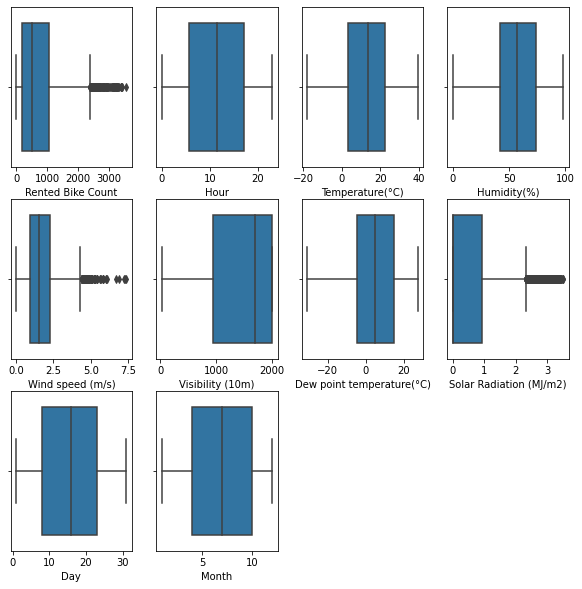

In [146]:
# looking for outliers using box plot
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in seoul_df_copy.describe().columns.to_list() if i not in ['Rainfall(mm)','Snowfall (cm)']]):
  plt.subplot(3,4,index+1)
  sns.boxplot(seoul_df_copy[item])

Looks like we dont have outliers in most of the varaibles except:

1. We have handled ouliers in our dv 'Rented bike count' by applying transformation.

2. Wind speed and solar radiation have outliers but as they are not that far from the maximum values we will keep them.

### Removing columns

Now its time to remove the columns which we think is not necessary from our analysis above.

In [147]:
# removing columns
seoul_df_copy.drop(columns=['Date','Dew point temperature(°C)','Rainfall(mm)','Snowfall (cm)','Holiday','Functioning Day','Year'],inplace=True)

In [148]:
# checking our dataframe
seoul_df_copy.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Day,Month
0,254,0,-5.2,37,2.2,2000,0.0,Winter,1,12
1,204,1,-5.5,38,0.8,2000,0.0,Winter,1,12


### Encoding 


This process refers to changing our categorical variable into numerical variable by changing classes into 0 or 1. This is important because machine learning models cannot process categorical variables and hence they must be converted. We will use a technique called One hot encoding to convert from categorical to numerical.

In [149]:
# One hot encoding the season variable
seoul_df_copy=pd.get_dummies(seoul_df_copy,columns=['Seasons'])

In [150]:
# checking the changes
seoul_df_copy.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,1,12,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,1,12,0,0,0,1
